# Imports

In [201]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

from scripts.clusterer import CluStream
from scripts.dynamic_clusterer import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
colors = get_colors()

def import_and_shuffle_csv(file_path):

  final_2d_data = np.loadtxt(file_path, delimiter=',')

  reference_data = final_2d_data[:1000]
  np.random.shuffle(reference_data)

  batch1 = final_2d_data[1000:1200]
  np.random.shuffle(batch1)

  batch2 = final_2d_data[1200:1400]
  np.random.shuffle(batch2)

  batch3 = final_2d_data[1400:1600]
  np.random.shuffle(batch3)

  batch4 = final_2d_data[1600:1800]
  np.random.shuffle(batch4)

  batch5 = final_2d_data[1800:2000]
  np.random.shuffle(batch5)

  return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [203]:
file_path, drift_type = './data/final_2d_data_brightness.csv', 'BRIGHTNESS'
#file_path, drift_type = './data/final_2d_data_contrast.csv', 'CONTRAST'
#file_path, drift_type = './data/final_2d_data_saturation.csv', 'SATURATION'
#file_path, drift_type = './data/final_2d_data_gaussian_noise.csv', 'GAUSSIAN_NOISE'
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [204]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
  clustream_model = CluStream(
      max_micro_clusters=200,
      time_window=100,
      seed=0,
  )
  drift_detector = drift.PageHinkley(delta= 0.0005, threshold=threshold)
  
  dynamic_clusterer = DynamicClusterer(data, clustream_model, drift_detector, colors, x_limits=(-10, 20), y_limits=(0,15), threshold=threshold)
  
  
  return dynamic_clusterer

New model created - id: 16031
(id: 0 - cen: [3.34 3.15] - rad: 1.13)
(id: 1 - cen: [5.37 6.9 ] - rad: 1.28)
<!> Change detected! Possible input drift at timestamp 22 ----> Apply macroclustering <!>



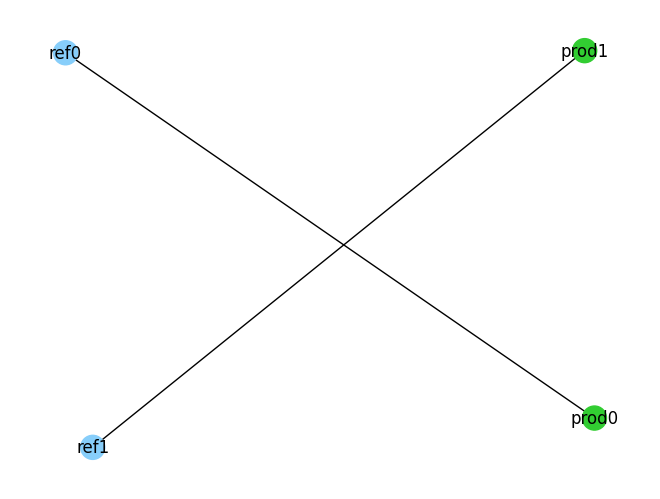

(id: 0 - cen: [3.34 3.15] - rad: 1.13) SURVIVED as (id: 0 - cen: [3.55 3.08] - rad: 1.25) (overlapping score: 0.9378081226420644)
(id: 1 - cen: [5.37 6.9 ] - rad: 1.28) SURVIVED as (id: 0 - cen: [5.4 6.9] - rad: 1.3) (overlapping score: 0.9919479643947887)
Final macroclusters:
(id: 0 - cen: [3.55 3.08] - rad: 1.25)
(id: 1 - cen: [5.4 6.9] - rad: 1.3)

-----------------------------------------------------------------------------------



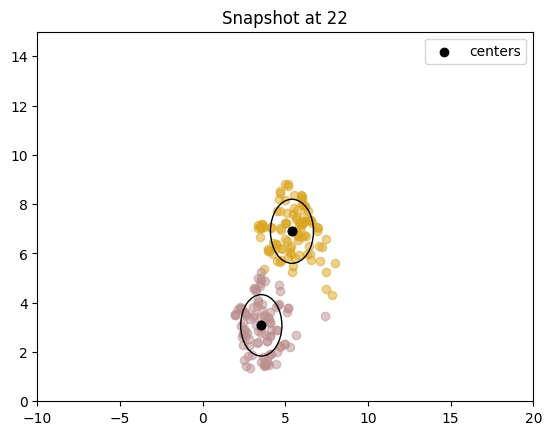

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 211 ----> Apply macroclustering <!>



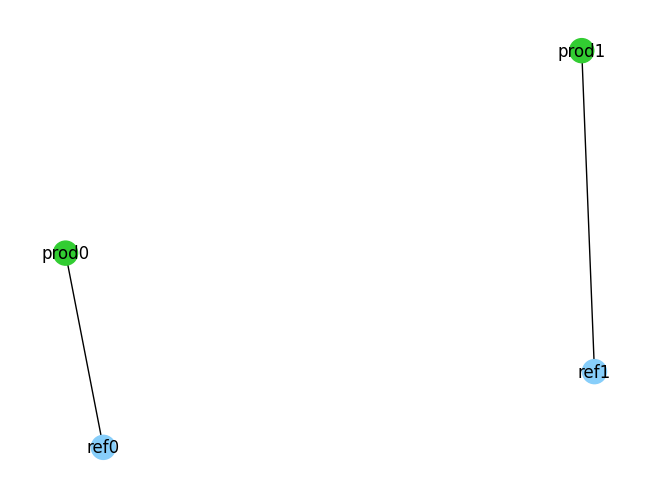

(id: 0 - cen: [3.55 3.08] - rad: 1.25) SURVIVED as (id: 0 - cen: [3.91 2.65] - rad: 1.32) (overlapping score: 0.8580120376550987)
(id: 1 - cen: [5.4 6.9] - rad: 1.3) SURVIVED as (id: 0 - cen: [6.19 6.42] - rad: 1.63) (overlapping score: 0.8045209749931392)
Final macroclusters:
(id: 0 - cen: [3.91 2.65] - rad: 1.32)
(id: 1 - cen: [6.19 6.42] - rad: 1.63)

-----------------------------------------------------------------------------------



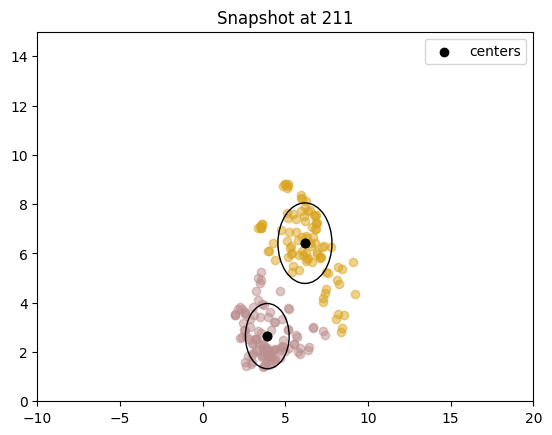

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 431 ----> Apply macroclustering <!>



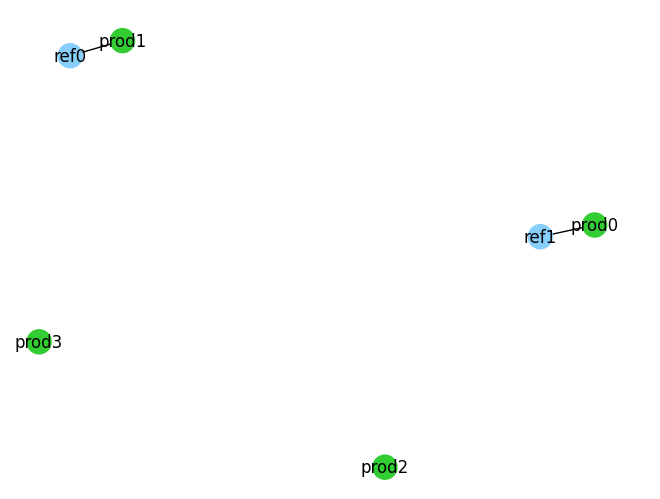

(id: 1 - cen: [6.19 6.42] - rad: 1.63) SURVIVED as (id: 0 - cen: [5.32 6.95] - rad: 1.3) (overlapping score: 0.7866333424959981)
(id: 0 - cen: [3.91 2.65] - rad: 1.32) SURVIVED as (id: 0 - cen: [3.08 3.13] - rad: 1.14) (overlapping score: 0.7646356397701909)
(!) (id: 2 - cen: [8.48 4.58] - rad: 1.01) APPEARED --- (score: 0.6956795726272971)
(!) (id: 3 - cen: [6.8  2.66] - rad: 0.77) APPEARED --- (score: 0.7425068390963436)
Final macroclusters:
(id: 0 - cen: [3.08 3.13] - rad: 1.14)
(id: 1 - cen: [5.32 6.95] - rad: 1.3)
(id: 2 - cen: [8.48 4.58] - rad: 1.01)
(id: 3 - cen: [6.8  2.66] - rad: 0.77)

-----------------------------------------------------------------------------------



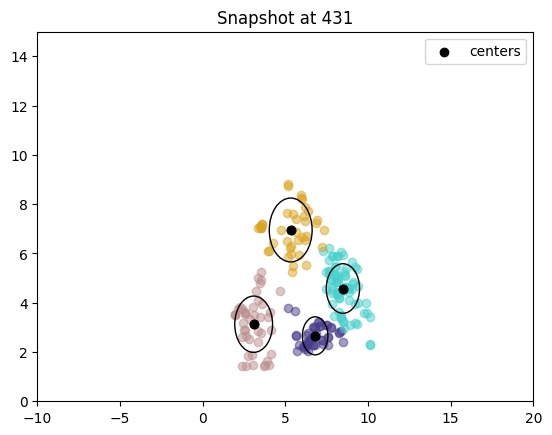

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 779 ----> Apply macroclustering <!>



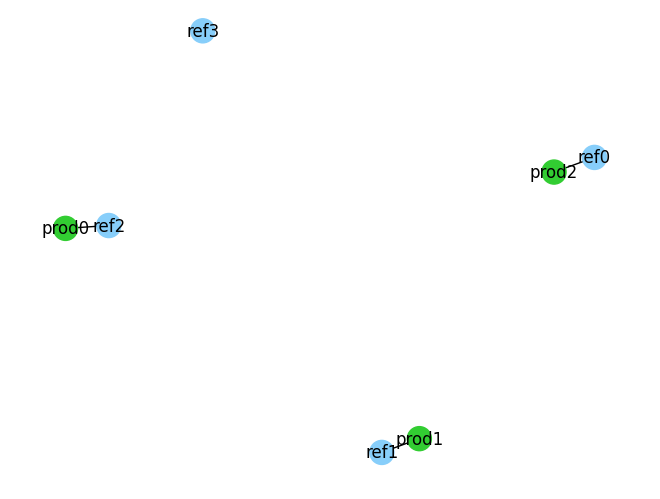

(!) (id: 3 - cen: [6.8  2.66] - rad: 0.77) DISAPPEARED
(id: 2 - cen: [8.48 4.58] - rad: 1.01) SURVIVED as (id: 0 - cen: [8.86 3.52] - rad: 1.31) (overlapping score: 0.7140281374122895)
(id: 1 - cen: [5.32 6.95] - rad: 1.3) SURVIVED as (id: 0 - cen: [5.16 6.95] - rad: 1.27) (overlapping score: 0.9580463152861021)
(id: 0 - cen: [3.08 3.13] - rad: 1.14) SURVIVED as (id: 0 - cen: [3.38 3.19] - rad: 1.31) (overlapping score: 0.9189071121332614)
Final macroclusters:
(id: 0 - cen: [3.38 3.19] - rad: 1.31)
(id: 1 - cen: [5.16 6.95] - rad: 1.27)
(id: 2 - cen: [8.86 3.52] - rad: 1.31)

-----------------------------------------------------------------------------------



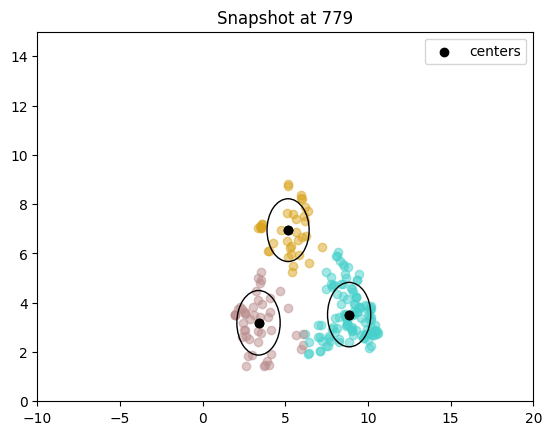

<Figure size 1000x1000 with 0 Axes>

Batch Finished ----> Apply macroclustering



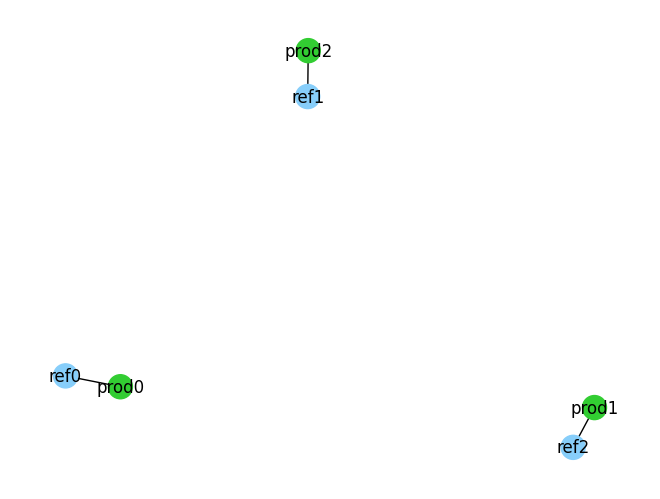

(id: 0 - cen: [3.38 3.19] - rad: 1.31) SURVIVED as (id: 0 - cen: [3.21 3.17] - rad: 1.19) (overlapping score: 0.9532595591999486)
(id: 2 - cen: [8.86 3.52] - rad: 1.31) SURVIVED as (id: 0 - cen: [9.38 3.31] - rad: 1.21) (overlapping score: 0.8566915093705632)
(id: 1 - cen: [5.16 6.95] - rad: 1.27) SURVIVED as (id: 0 - cen: [5.31 6.92] - rad: 1.34) (overlapping score: 0.9612502860817465)
Final macroclusters:
(id: 0 - cen: [3.21 3.17] - rad: 1.19)
(id: 1 - cen: [5.31 6.92] - rad: 1.34)
(id: 2 - cen: [9.38 3.31] - rad: 1.21)

-----------------------------------------------------------------------------------



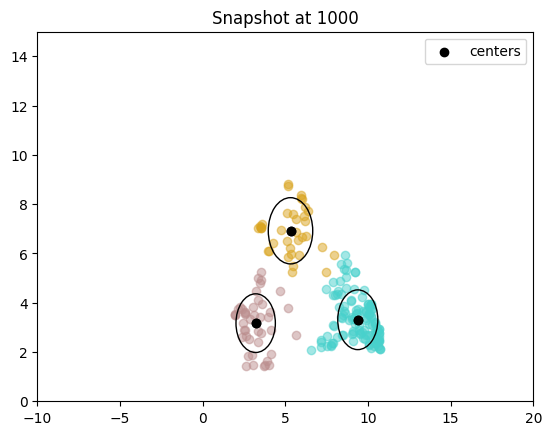

<Figure size 1000x1000 with 0 Axes>

In [205]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=True, print_graph=True, macroclustering_at_end=True)

#clustream.draw_snapshots()
clustream.draw_gif(title=drift_type)

In [206]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")


Directory './plots/16031' and its contents removed successfully.
Deleted 16031
